In [61]:
import pandas as pd
from matplotlib.ticker import MaxNLocator

## Data

In [55]:
# Read Data
df = pd.read_csv('../cases.csv')

# Cleansing
df['Staff/Student'] = df['Staff/Student'].str.capitalize()
df['Dept'] = df['Dept'].replace({r'[^\x00-\x7F]+':''}, regex=True)

# Add a 'date' column
date = pd.to_datetime([d[0] for d in df['Case Ref.'].str.split('-')])
df['Date'] = pd.Series(date)

df

,Case Ref.,Staff/Student,Dept,Hall Resident,Reported Status,Date of Last Presence on Campus,Place(s) Visited and Special follow-up actions,Date
0,20220207-1,Student,SN,N,Preliminary Positive,29/1/2022 0:00,VA324,2022-02-07
1,20220207-2,Student,APSS,N,Confirmed,20/1/2022 0:00,R406,2022-02-07
2,20220207-3,Student,ABCT,N,Confirmed,25/1/2022 0:00,Y604,2022-02-07
3,20220207-4,Student,SN,N,Confirmed,27/1/2022 0:00,N.A.,2022-02-07
4,20220208-1,Student,LSGI,N,Positive (taking rapid antigen test),7/2/2022 0:00,ZN604,2022-02-08
...,...,...,...,...,...,...,...,...
154,20220220-15,Student,EE,Y,Positive (RAT),15-Feb-22,VA Canteen,2022-02-20
155,20220220-16,Student,CEE,Y,Confirmed,9-Feb-22,N.A.,2022-02-20
156,20220220-17,Student,APSS,Y,Confirmed,15-Feb-22,GH417,2022-02-20
157,20220220-18,Student,FB,Y,Positive (RAT),Not on campus in the past 28 days,N.A.,2022-02-20


## Daily Cases

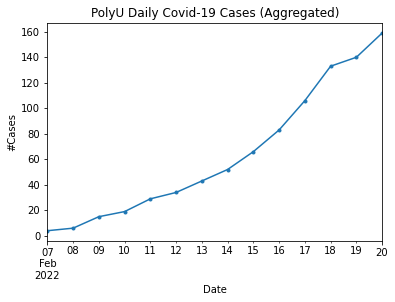

In [3]:
case_by_day = df.groupby(['Date'])['Case Ref.'].count().cumsum()
args = {
    'title': "PolyU Daily Covid-19 Cases (Aggregated)",
    'kind': 'line',
    'style': '.-',
    'xlabel': 'Date',
    'ylabel': '#Cases'
}

ax_case_by_day = case_by_day.plot(**args)

## Comparison among Groups

In [4]:
# daily cases for different groups
def group_by_date_with(column_name, **args):
    gb = df.groupby(['Date', column_name]).count().unstack()['Case Ref.']
    gb = gb.fillna(0)
    gb = gb.cumsum()
    gb.plot(kind='line', **args)

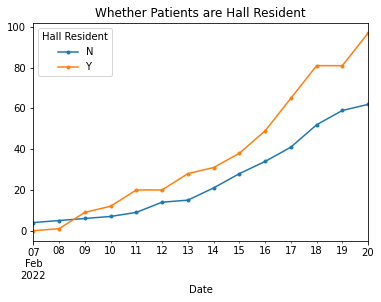

In [5]:
group_by_date_with('Hall Resident', style = '.-', title='Whether Patients are Hall Resident')

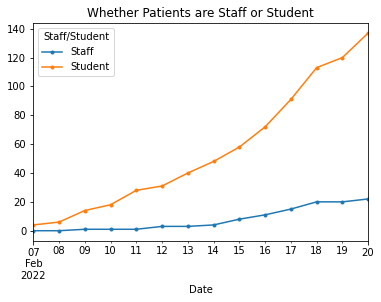

In [6]:
group_by_date_with('Staff/Student', style='.-',title='Whether Patients are Staff or Student')

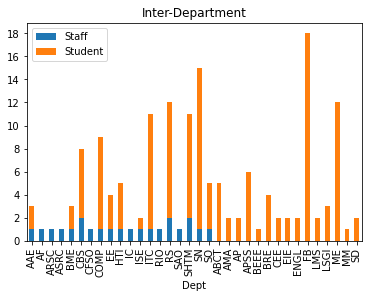

In [63]:
dsc = df[['Dept', 'Staff/Student', 'Case Ref.']]
staff = dsc[dsc['Staff/Student'] == 'Staff'][['Dept', 'Case Ref.']].groupby('Dept').count()
student = dsc[dsc['Staff/Student'] == 'Student'][['Dept', 'Case Ref.']].groupby('Dept').count()

ax = pd.concat([staff, student], axis=1).set_axis(['Staff', 'Student'], axis=1).fillna(0).plot(kind='bar', stacked=True, title='Inter-Department')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # integer y ticks